In [1]:
import os
import pyautogui
from PIL import Image
import pandas as pd
import numpy as np
import cv2
import re
from time import sleep
import time
from PIL import Image, ImageFilter
import Levenshtein
import matplotlib.pyplot as plt 
import string
import logging
import json


from Python_code.Image_to_text import Image_to_text
from Python_code.Pokemon_Trainer_AI import Pokemon_Trainer_AI
from Python_code.Fight_code import *
from Python_code.images_are_similar import *
from Python_code.Posicion_actual import *
from Python_code.Python_to_game import *

In [2]:
logger = logging.getLogger('simple_example')
logger.setLevel(logging.DEBUG)
console = logging.StreamHandler()
console.setLevel(level=logging.DEBUG)
#logger.debug('simple message')

In [3]:
AI=Pokemon_Trainer_AI()

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

100%|██████████| 3/3 [01:05<00:00, 21.99s/it]


In [395]:
def load_image_means():
    if os.path.isfile("Image_means.txt"):
        return pd.read_csv("Image_means.txt")
    else:
        return recalculate_image_means()

def save_image_means(image_means):
    image_means.to_csv("Image_means.txt",index=False)

def calculate_image_means(image):
    return np.mean(np.array(image),axis=(0,1))

def recalculate_image_means():
    screenshot_dir = "Different_objects"
    means=[]
    for filename in os.listdir(screenshot_dir):
        existing_image=Image.open(os.path.join(screenshot_dir, filename))
        means.append(calculate_image_means(existing_image))
    
    return pd.DataFrame({"R":[means[i][0] for i in range(len(means))],"G":[means[i][1] for i in range(len(means))],"B":[means[i][2] for i in range(len(means))]})

def Possible_images(image,image_means):
    media=calculate_image_means(image)
    diffR=image_means.loc[:,"R"]-media[0]
    diffG=image_means.loc[:,"G"]-media[1]
    diffB=image_means.loc[:,"B"]-media[2]
    return list(image_means[(diffR**2+diffG**2+diffB**2)/3<4].index)


In [4]:
def crop_into_pixels(image):
    # Calculate the size of each rectangle
    width, height = image.size

    rect_widths = [round(width / 15)] * 15#Horizontally there´s 15 pixels

    rows = [0.5] + [1] * 9 + [0.5] #The screen is has two half rows, it goes:  half, 4,player,4, half
    rect_heights = [round(height*r/sum(rows)) for r in rows]

    # Cut the image into rectangles
    rectangles = []
    #We´re gonna skip the bottom and top row as they´re half pixels
    for i in range(1,len(rect_heights) - 1):
        upper = sum(rect_heights[:i])
        lower = upper + rect_heights[i]
        
        row=[]
        for j in range(len(rect_widths)-1):
            left = sum(rect_widths[:j])
            right = left + rect_widths[j+1]      
            
            #First we´ll obtain the rectangle relating to the big pixel that (where a player interacts)
            rect = image.crop((left, upper, right, lower))
            #As the player is bigger than a pixel, we need to crop all the imagesby 30 from below
            #This way the player´s top part of the hat´ll never appear
            #width, height = rect.size
            #rect=rect.crop((0, 0, width, height - 30))
            
            row.append(rect)
        rectangles.append(row)
    return rectangles

In [5]:
def screenshot():
    return pyautogui.screenshot(region=(960,241,960,640))#pyautogui.screenshot(region=(968,250,952,628))

In [402]:
images_are_similar(Image.open("Different_objects/969.png"),Image.open("Different_objects/1184.png"),threshold=0.05)

True

In [408]:
Possible_images(Image.open("Different_objects/1252.png"),load_image_means())

[110, 156, 910, 1067, 1249, 1250, 1251, 1252]

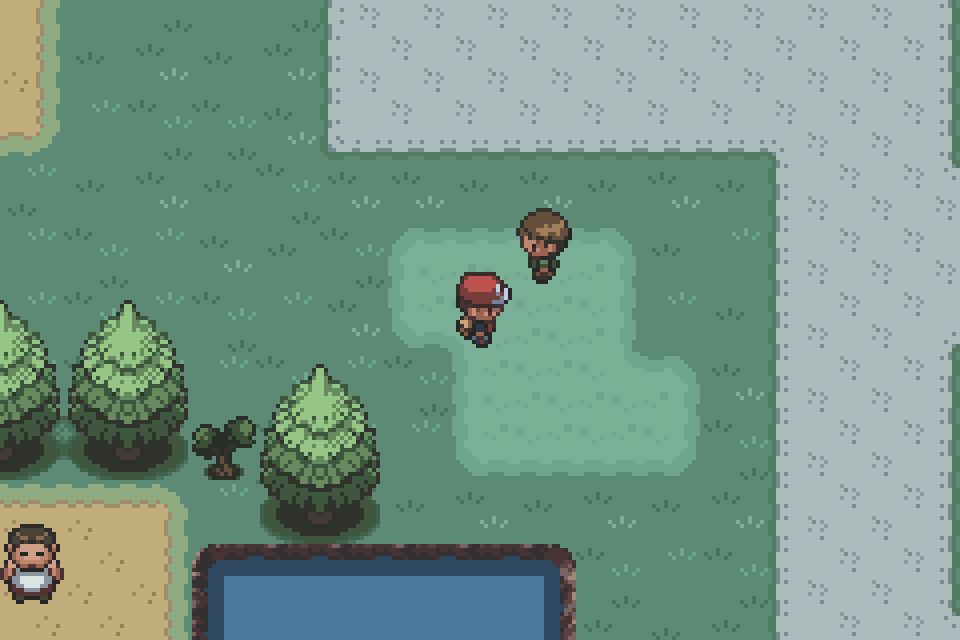

In [406]:
Go_to_game()
screenshot()

In [407]:
Go_to_game()
find_and_save_unique_images(crop_into_pixels(screenshot()))

0.0075452327728271484 False
0.006317853927612305 False
0.012390375137329102 False
0.002499818801879883 False
0.0031557083129882812 False
0.006297588348388672 False
0.00851297378540039 False
0.0068683624267578125 False
0.002493619918823242 True
0.002032041549682617 True
0.00658869743347168 True
0.008043050765991211 False
0.0030417442321777344 False
0.006793022155761719 True
0.005014181137084961 False
0.0071370601654052734 False
0.004055976867675781 False
0.0076503753662109375 False
0.0045545101165771484 False
0.008987903594970703 False
0.0070705413818359375 True
0.0021486282348632812 False
0.004006385803222656 False
0.001974344253540039 False
0.0025310516357421875 False
0.0030133724212646484 False
0.0020601749420166016 False
0.0020105838775634766 False
0.001989126205444336 False


array([[1158, 1159, 1159, 1159, 1159, 1160, 1161, 1161, 1161, 1161, 1161,
        1161, 1161, 1161],
       [1163, 1159, 1159, 1159, 1159, 1164, 1165, 1165, 1166, 1165, 1165,
        1165, 1161, 1161],
       [1159, 1159, 1159, 1159, 1159, 1159, 1159, 1159, 1248, 1159, 1159,
        1159, 1160, 1161],
       [1159, 1159, 1159, 1159, 1159, 1159, 1249,   -2, 1249, 1250, 1159,
        1159, 1160, 1161],
       [1170, 1169, 1170, 1159, 1159, 1159, 1251,   -1, 1205, 1250, 1159,
        1159, 1160, 1161],
       [1173, 1172, 1173, 1159, 1169, 1170, 1159, 1249, 1205, 1205, 1250,
        1159, 1160, 1161],
       [1176, 1175, 1176, 1177, 1172, 1173, 1159, 1251, 1251, 1251, 1252,
        1159, 1160, 1161],
       [1180, 1181, 1182, 1159, 1175, 1176, 1159, 1159, 1159, 1159, 1159,
        1159, 1160, 1161],
       [1184, 1157, 1158, 1185, 1186, 1186, 1186, 1186, 1187, 1159, 1159,
        1159, 1160, 1161]])

In [410]:
def find_and_save_unique_images(images,omit_player=True,pos_especial=-2):
    image_means=load_image_means()

    # Get list of unique images from a list of lists of images
    screenshot_dir = "Different_objects"
    if not os.path.exists(screenshot_dir):
        os.makedirs(screenshot_dir)

    unique_images = []
    #This is the numbers associated to each image in the map, first we´ll fill it with the index corresponding
    #To the unique images, then we´ll fill it with the name of the corresponding png unique images
    map_indices = np.zeros((len(images),len(images[0])))
    map_as_numbers = np.zeros((len(images),len(images[0])))

    for i, image_list in enumerate(images):
        for j, image in enumerate(image_list):
            if not (i in [3,4] and j==7):
                #if all([not images_are_similar(image, unique_image,threshold=0.10) for unique_image in unique_images]):
                #    unique_images.append(image)
                
                comparisons=[images_are_similar(image, unique_image,threshold=0.05) for unique_image in unique_images]
                
                if any(comparisons):
                    #Si ya existe la imagen le asignamos el número que le corresponde
                    index=np.argmax(comparisons)
                    map_indices[i,j]=index
                else:  
                    #Aquí el orden importa
                    map_indices[i,j]=len(unique_images)
                    unique_images.append(image)
            elif i==3:
                #es la casilla encima del jugador
                map_indices[i,j]=-1#No le asignamos un índice útil
                map_as_numbers[i,j]=pos_especial#Aquí tendremos dos casos

            else:
                #i==4 es el jugador
                map_indices[i,j]=-1#No le asignamos un índice útil
                map_as_numbers[i,j]=-1#Le asignamos imagen vacía (no existe el -1)

    start_number = len(os.listdir(screenshot_dir))
    n_new_images=0
    for i,image in enumerate(unique_images):
        new_image=True
        lista_posibles_imgs=Possible_images(image,image_means)
        for j in lista_posibles_imgs:
            filename=f"{j}.png"
            existing_image=Image.open(os.path.join(screenshot_dir, filename))
            if images_are_similar(image, existing_image,threshold=0.05):
                number_png=int(filename.split(".")[0])
                map_as_numbers[map_indices==i]=number_png
                new_image=False
                continue
        if new_image:
            filename = f"{start_number+n_new_images}.png"
            image.save(os.path.join(screenshot_dir, filename))
            Info_object(start_number+n_new_images).save()
            map_as_numbers[map_indices==i]=start_number+n_new_images
            image_means=pd.concat([image_means,pd.DataFrame([calculate_image_means(image)],columns=["R","G","B"])],ignore_index=True)

            n_new_images+=1
        
    save_image_means(image_means)
            
            

    return map_as_numbers.astype(int)

In [295]:
pd.Series([20,1,2,3]).to_csv("test.txt",index=False,header=False)

3

In [274]:
a=Image.open(os.path.join("Different_objects", "1.png"))

In [290]:
np.mean(np.array(a),axis=(0,1))

array([ 80.20703125, 107.6484375 ,  78.9375    ])

In [286]:
np.array(a)[:,:,0]

array([[ 65,  65,  65, ..., 102, 102, 102],
       [ 65,  65,  65, ..., 102, 102, 102],
       [ 65,  65,  65, ..., 102, 102, 102],
       ...,
       [ 73,  73,  73, ..., 149, 149, 149],
       [ 73,  73,  73, ..., 149, 149, 149],
       [ 73,  73,  73, ..., 149, 149, 149]], dtype=uint8)

In [7]:
def show_numbers_to_image(map_as_numbers):
    """Esta función es una comprobación, sirve para ver el mapa obtenido en forma de números"""
    # Get the unique numbers in the array
    numbers = np.unique(map_as_numbers)
    # Load the images corresponding to each number
    images = {number: Image.open(f'Different_objects/{int(number)}.png') if number not in [-1,-2] else Image.new('RGB', (64, 64), color = 'black') for number in numbers}

    # Create an empty list to hold the rows of images
    rows = []
    # For each row in the array
    for row in map_as_numbers:
        # Create an empty list to hold the images in this row
        images_row = []
        # For each number in the row
        for number in row:
            # Append the corresponding image to the row
            images_row.append(images[number])
        # Stitch the images in the row together and append the result to the rows list
        rows.append(Image.fromarray(np.hstack([np.array(img) for img in images_row])))

    # Stitch the rows together to create the final image
    return Image.fromarray(np.vstack([np.array(row) for row in rows]))

In [8]:
def Objetos_son_iguales(item1, item2):
    return (item2 in Info_object(item1).objetos_iguales) or item1==item2

In [9]:
class Pokemon_class():
    def __init__(self, name, level=0,max_hp=0, moves=[], status="", has_fainted=False,hp=0):
        self.name=name.lower()
        self.level=level
        self.max_hp=max_hp
        self.hp=hp
        self.moves=moves
        self.status=status
        
        self.has_fainted=False

    def moves_explanation(self):
        move_explanation=""
        for move in self.moves:
            Power=moves_df[moves_df["Name"]==move]["Power"].iat[0]
            Type=moves_df[moves_df["Name"]==move]["Type"].iat[0]
            move_explanation+=f"""{move} is a {Type} move that deals {Power} damage. \n"""
        return move_explanation
    
class Trainer_info_class():
    def __init__(self, name="", money=0, badges=[], Pokemons=[]):
        self.name=name
        self.money=money
        self.badges=badges
        self.Pokemons=Pokemons

    def get_pokemon(self,name):
        name=name.strip().lower()

        dists=[Levenshtein.distance(name, x.name.lower()) for x in self.Pokemons]
        return self.Pokemons[np.argmin(dists)]

In [505]:
class Vision_class():
    
    def __init__(self, mapa=None):
        self.mapa=mapa
        self.traslacion_trad={"up":(-1,0),"down":(1,0),"left":(0,-1),"right":(0,1)}
        self.cc_a_traslacion={(-1,0):"up",(1,0):"down",(0,-1):"left",(0,1):"right"}
        self.direccion_opuesta={"up":"down","down":"up","left":"right","right":"left"}
        self.mirando=None

    def update(self,traslacion=None,wait=True):
        """Updates our knowledge of the map, if traslacion is not None we can update the map faster, it can be: up, down, left or right.
        It returns the traslation (in cc), and a bool that will be True if the map has changed"""
        if wait:#This is so that it isn´t used while moving
            sleep(0.1)
        if not En_campo():
            raise Exception("No estamos en el mapa, no se puede actualizar el mapa")
        
        if self.Hay_texto():
            raise Exception("Hay texto en la pantalla, no se puede actualizar el mapa")
        
        mapa_actual=find_and_save_unique_images(crop_into_pixels(screenshot()))

        #Si no tenemos mapa, lo guardamos y salimos
        if self.mapa is None:
            self.mirando=None
            self.mapa=mapa_actual
            return None,True
        else:
            ##Teníamos mapa,comprobamos si es exactamente el mismo (sin traslaciones)
            #if self.Es_el_mismo_mapa(mapa_actual):
            #    return None,False
            
            #Miramos si es una traslación en 1 del mapa anterior (ya sea por indicación nuestra o cálculo)
            if traslacion is None:
                #Si el input the traslación es vacío miramos si se ha trasladado el mapa
                traslacion=self.direccion_traslado(mapa_actual)
            else:
                traslacion=self.traslacion_trad[traslacion]
                #Hacemos una comparación no vaya a ser que nos hayamos equivocado (o alome hemos atravesado una puerta)
                if not self.Es_el_mismo_mapa(mapa_actual,traslacion[0],traslacion[1]):
                    traslacion=None

            if traslacion is None:
                self.mirando=None
                #Si realmente no encontramos una dirección de traslado es que no es el mismo mapa
                self.mapa=mapa_actual
                return traslacion,True
            else:
                self.mapa=self.trasladar_mapa(mapa_actual,traslacion)
                self.mirando=self.cc_a_traslacion[traslacion]
                return traslacion,False
          

    def Es_el_mismo_mapa(self, mapa,tras_i=0,tras_j=0):
        """Comparamos el mapa almacenado trasladado en (tras_i,tras_j) con otro mapa """
        if self.mapa is None:
            return False
        cambios=0
        cuentas=0
        pos_cambios=[]
        for i in range(len(mapa)):
            for j in range(len(mapa[0])):
                if (not (i in [3,4] and j==7)) and (not (i+tras_i in [3,4] and (j+tras_j)==7)) and (i+tras_i)>0 and (i+tras_i)<len(mapa) and (j+tras_j)>0 and (j+tras_j)<len(mapa):
                    cuentas+=1
                    if not Objetos_son_iguales(self.mapa[i+tras_i][j+tras_j],mapa[i][j]):
                        cambios+=1
                        pos_cambios.append((i,j))
        
        #Si hay muchos cambios diremos que hemos cambiado de sitio
        if cambios>0.2*cuentas:
            # print("n_cambios",cambios)
            return False

        #Suponiendo que es el mismo mapa, ahora trataremos de decir si dos objetos son realmente lo mismo

        #1ºcaso: si hay un pixel modificado rodeado por píxeles no cambiados, esto será un cambio de posición (como las flores)
        for i,cambio in enumerate(pos_cambios):
            Esta_rodeado=True
            for otro_cambio in pos_cambios[i+1:]:
                if abs(cambio[0]-otro_cambio[0])<=1 and abs(cambio[1]-otro_cambio[1])<=1:
                    Esta_rodeado=False
            if Esta_rodeado:    
                Info_object(self.mapa[cambio[0]+tras_i][cambio[1]+tras_j]).Add_transformation(mapa[cambio[0]][cambio[1]])                
        
        ####2ºcaso: si hay tres píxeles modificados, debido a que un npc ha bajado o subido. Miraremos el pixel de arriba a ver si se ha mantenido igual, o el de abajo
        ###for i,cambio in enumerate(pos_cambios):
        ###    Uno_encima=None
        ###    for otro_cambio in pos_cambios:
        ###        if otro_cambio[0]==cambio[0]-1 and cambio[1]==otro_cambio[1]:
        ###            Uno_encima=otro_cambio
        ###    if Uno_encima not None:
        ###        Dos_encima=None
        ###        for otro_cambio in pos_cambios:
        ###            if otro_cambio[0]==cambio[0]-2 and cambio[1]==otro_cambio[1]:
        ###                Dos_encima=otro_cambio
        ###        if Dos_encima not None:
        ###            #Si un npc sube para arriba
        ###            #Miramos las partes de abajo
        ###            if Objetos_son_iguales(self.mapa[cambio[0]+tras_i][cambio[1]+tras_j],mapa[cambio[0]-1][cambio[1]]):
        ###                
        ###            #Miramos las partes de arriba
        ###            if Objetos_son_iguales(self.mapa[cambio[0]+tras_i-2][cambio[1]+tras_j],mapa[cambio[0]-1][cambio[1]]):
        ###                

        ###            #Si un npc baja para abajo
        ###            #Miramos las partes de abajo
        ###            if Objetos_son_iguales(self.mapa[cambio[0]+tras_i-1][cambio[1]+tras_j],mapa[cambio[0]][cambio[1]]):
        ###                
        ###            #Miramos las partes de arriba
        ###            if Objetos_son_iguales(self.mapa[cambio[0]+tras_i-2][cambio[1]+tras_j],mapa[cambio[0]-1][cambio[1]]):
        ###                
        ###    if Esta_rodeado:    
        ###        Info_object(self.mapa[cambio[0]+tras_i][cambio[1]+tras_j]).Add_transformation(mapa[cambio[0]][cambio[1]])                
        


        ##Si el número de cambios es menor o igual que 4 (una persona cambia de background) trataremos de unir imágenes diciendo que realmente son la misma 
        #if cambios<=4:
        #    if cambios==1            

        return True

    def Ha_cambiado_el_mapa(self):
        """Comparamos el mapa almacenado con el actual (lo usaremos para la función de orientación)"""
        mapa_actual=find_and_save_unique_images(crop_into_pixels(screenshot()))
        return not self.Es_el_mismo_mapa(mapa_actual)

    
    def direccion_traslado(self,mapa_actual):
        """El objetivo es ver si el mapa actual es el mismo que el almacenado trasladado en (tras_i,tras_j)"""
        tras_i=0
        tras_j=0
        if self.Es_el_mismo_mapa(mapa_actual):
            pass #No nos hemos movido
        elif self.Es_el_mismo_mapa(mapa_actual,tras_i=1):
            tras_i=1  #Hemos movido a la abajo
        elif self.Es_el_mismo_mapa(mapa_actual,tras_i=-1):
            tras_i=-1 #Hemos movido a la arrriba
        elif self.Es_el_mismo_mapa(mapa_actual,tras_j=1):
            tras_j=1 #Hemos movido derecha
        elif self.Es_el_mismo_mapa(mapa_actual,tras_j=-1):
             tras_j=-1 #Hemos movido izquierda
        else:
            print("Nada")
            return None #Puede que sea completamente distinto
        return tras_i,tras_j
    
    def trasladar_mapa(self,mapa,traslacion):
        tras_i,tras_j=traslacion
        if self.mapa[3+tras_i,7+tras_j]!=-1:
            mapa[3,7]=self.mapa[3+tras_i,7+tras_j]
        if self.mapa[4-tras_i,7-tras_j]!=-2:
            mapa[4,7]=self.mapa[4+tras_i,7+tras_j]

        return mapa.copy()

    def show(self):
        return show_numbers_to_image(self.mapa)
    
    def describe(self):
        msg="{self.mapa}\n"
        for num in np.unique(self.mapa):
            msg+=f"{Info_object(num).describe()}\n"
        return msg


    def Go_to(self,x,y):
        """Vamos a la casilla (x,y). Este algoritmo hay que hacerlo eficiente (porque alome se puede quedar mirando una pared)"""
        if not En_campo():
            return
        
        while self.Hay_texto():
            #A veces puede haber texto por señales
            Apply_command("A")
        #Primero miramos si estamos en la casilla
        if y<0:
            Apply_command("up")
            if not self.Ha_cambiado_el_mapa():
                Apply_command("up")
            self.update("up")
            sleep(0.1)
            self.mirando="up"
            self.Go_to(x,y+1)
        elif y>0:
            Apply_command("down")
            if not self.Ha_cambiado_el_mapa():
                Apply_command("down")
            self.update("down")
            sleep(0.1)
            self.mirando="down"
            self.Go_to(x,y-1)
        if x>0:
            Apply_command("right")
            if not self.Ha_cambiado_el_mapa():
                print("No cambio")
                Apply_command("right")
            self.update("right")
            sleep(0.1)
            self.mirando="right"
            self.Go_to(x-1,y)
        elif x<0:
            Apply_command("left")
            if not self.Ha_cambiado_el_mapa():
                Apply_command("left")
            self.update("left")
            sleep(0.1)
            self.mirando="left"
            self.Go_to(x+1,y)
        return


    def Hay_texto(self):
        """Miramos que en la zona de texto haya mas blanco que cualquier otro color"""
        screenshot = pyautogui.screenshot(region=(1020,720,800, 120))
        # Convert the image to grayscale for easier pixel analysis
        grayscale_image = screenshot.convert('L')
        pixels = list(grayscale_image.getdata())
        # Por encima de 210 diremos que es blanco
        threshold = 210
        n_pixeles_blancos = sum(1 for pixel in pixels if pixel > threshold)

        return n_pixeles_blancos>0.5*len(pixels)


    def _mapa_simplified_as_array(self,put_player=True):
        mapa_simplified=np.zeros(self.mapa.shape).astype(str)
        
        for i in np.unique(self.mapa):
            if i not in [-1,-2]:
                obj=Info_object(i)
                mapa_simplified[self.mapa==i]=obj.tipo_trad[obj.tipo]
            elif i==-1:
                mapa_simplified[self.mapa==i]="P"
            if i==-2:
                mapa_simplified[self.mapa==i]="T"
        
        if put_player:
            mapa_simplified[4][7]="P"
        
        return mapa_simplified
        
    def mapa_simplified(self):
        msg=""

        mapa_simplified=self._mapa_simplified_as_array()
        for i in range(len(mapa_simplified)):
            for j in range(len(mapa_simplified[0])):
                if i==4 and j==7:
                    msg+="P"                
                else:
                    msg+=mapa_simplified[i][j]
            msg+="\n"

        msg+="X are walls\n"
        msg+="P is the player\n"
        msg+="U is something unknown\n"
        msg+="O is background\n"
        msg+="T is a temporarily unknown\n"
        return msg
    
    def Orientar_mirada(self,orientacion,restart=False):
        """Orientacion puede ser up,down,left,right. Esta función es costosa si no sabemos ya la orientación"""

        if restart:
            self.mirando=None
        if self.mirando==orientacion:
            return

        if not En_campo():
            return        

        Apply_command(orientacion);sleep(0.1)
        msg=""
        while self.Hay_texto():
            #A veces puede haber texto por señales
            msg+=Read_text();sleep(0.1)
            Apply_command("A");sleep(0.1)

        if self.Ha_cambiado_el_mapa():
            #Si nos hemos movido detectaremos un cambio en el mapa
            self.update(orientacion)
            Apply_command(self.direccion_opuesta[orientacion])
            Apply_command(self.direccion_opuesta[orientacion]);sleep(0.1)
            self.update(self.direccion_opuesta[orientacion])
            Apply_command(orientacion);sleep(0.1)
        
        self.mirando=orientacion
        return msg

    def _casilla_adyacente(self,pos):
        """Devuelve las coordenadas de la casilla adyacente"""
        if pos=="up":
            return (3,7)
        elif pos=="down":
            return (5,7)
        elif pos=="left":
            return (4,6)
        elif pos=="right":
            return (4,8)
        else:
            raise Exception("Posicion no valida")
    
    def _objeto_casilla_adyacente(self,pos):
        cc=self._casilla_adyacente(pos)
        return Info_object(self.mapa[cc[0],cc[1]])

    def Moverse(self,pos):
        """Funcion general cuando queremos movernos a una casilla adyacente (si no estamos mirando solo se girará)"""
        Apply_command(pos);sleep(0.1)

        msg=""
        while self.Hay_texto():
            msg+=Read_text();sleep(0.1)
            Apply_command("A");sleep(0.1)
        x,y=self.update(pos)
        return msg,x,y

    def Estudiar_casilla(self,pos):
        """Estudiamos la casilla en la pos adyacente a la que estamos, pos puede ser: up,down,left,right"""
        self.Orientar_mirada(pos)
        obj=self._objeto_casilla_adyacente(pos)
        if obj.name=="-2":
            logger.info("Objeto no estudiable (gorra jugador la tapa)")
            return

        #Veamos si es interactuable (si lo es, guardamos lo que nos diga)
        Apply_command("A");sleep(0.1)
        msgs=""
        interactable=False
        while self.Hay_texto():
            interactable=True
            msgs+=Read_text();sleep(0.1)
            #Aquí podemos hacer la acción que queramos, seleccionar una opción, darle a la A, etc
            #De momento siempre le daremos a la A
            Apply_command("A");sleep(0.1)
        
        #Veamos si podemos caminar encima de el
        msg,traslacion,Nuevo_mapa=self.Moverse(pos)
        walkable=False
        door=False
        if traslacion is not None:
            print("Hemos caminado")
            walkable=True
            if Nuevo_mapa:
                print("Es una puerta")
                door=True
            self.update(pos)
            Apply_command(self.direccion_opuesta[pos]);sleep(0.1)
            self.update(pos)
            Apply_command(self.direccion_opuesta[pos]);sleep(0.1)
            sleep(0.1)
            self.update(self.direccion_opuesta[pos]);sleep(0.1)
            Apply_command(pos)
        
        print(f"walkable:{walkable}, interactable:{interactable}, door:{door}")
        #Actualizamos el objeto      
        obj.Actualizacion_completa(walkable = walkable,interactable = interactable,door = door,text_info=msgs)        

    def _Estudiar_casilla_adyacente(self,pos):
        mapa=self._mapa_simplified_as_array()
        tras=self._casilla_adyacente(pos)
        if mapa[tras[0],tras[1]]=="U":
            self.Estudiar_casilla(pos)
    
    def _Casillas_adyacentes_desconocidas(self):
        mapa=self._mapa_simplified_as_array()
        dirs=["up","down","left","right"]
        tras=[self._casilla_adyacente(x) for x in dirs]

        ubicaciones=[]
        for x,z in zip(dirs,tras):
            if mapa[z[0],z[1]]=="U":
                ubicaciones.append(x)
        return ubicaciones
    
    def Estudiar_alguna_casilla_adyacente(self):
        lista=self._Casillas_adyacentes_desconocidas()
        if len(lista)>0:
            self.Estudiar_casilla(lista[0])
            return True
        return False

    def Ponerse_adyacente_a_una_casilla_desconocida(self):
        mapa=self._mapa_simplified_as_array()
        Distances=[abs(x-4)+abs(y-7) for x,y in zip(np.where(mapa=="U")[0],np.where(mapa=="U")[1])]
        if len(Distances)==0:
            return False
        index=np.argmin(Distances)
        self.Go_to(np.where(mapa=="U")[1][index]-7,np.where(mapa=="U")[0][index]-4+1)
        return True


In [421]:
Go_to_game()

True

In [423]:
vision.update()

In [425]:
vision.direccion_traslado(find_and_save_unique_images(crop_into_pixels(screenshot())))

Nada


In [87]:
class Info_object():
    def __init__(self, name,load=True, tipo=None,walkable=None, interactable=None, door=None, investigated=None,text_info="",objetos_iguales=[],transformable_en=[]):
        self.name=int(round(name))
        self.tipo_trad={"background":"O","wall":"X",None:"U","door":"D"}
        if load:
            self.load()
        else:
            self.tipo=tipo
            self.walkable = walkable
            self.interactable = interactable
            self.door = door
            self.investigated=investigated
            self.text_info=text_info
            self.objetos_iguales=objetos_iguales
            self.transformable_en=transformable_en
            #Lisf of things it can be on top of (backgrounds can change, and we will only add to this if we see it move)
            #self.always_on_top_of= always_on_top_of

    def describe(self):
        if self.name==-2:
            return f"{self.name}: Ignora este objeto en esta ronda"
        if self.name==-1:
            return f"{self.name}: Is the player character"
        #if not self.investigated:
        #    return f"""{self.name}:  Is unknown what it is"""
        if self.door:
            return f"""{self.name}:  Is a door"""
        return f"""{self.name}: You can {"not"*(not self.walkable)} walk on it and you can {"not"*(not self.interactable)} interact with it"""
    
    def save(self):
        with open(f"Info_different_objects/{self.name}.json","w") as f:
            json.dump({
                    "name":self.name, 
                    "tipo":self.tipo,
                    "walkable":self.walkable,
                    "interactable":self.interactable,
                    "door":self.door,
                    "investigated":self.investigated,
                    "text_info":self.text_info,
                    "objetos_iguales":self.objetos_iguales,
                    "transformable_en":self.transformable_en
                    },f)
    
    def load(self):
        filename=f"Info_different_objects/{self.name}.json"
        if not os.path.isfile(filename):
            logger.debug(f"Func Info_object: No existe el archivo {filename}")
            self.__dict__=Info_object(self.name,load=False).__dict__.copy()
        else:
            info=json.load(open(filename,"r"))
            self.name=info["name"]
            self.tipo=info["tipo"]
            self.walkable=info["walkable"]
            self.interactable=info["interactable"]
            self.door=info["door"]
            self.investigated=info["investigated"]
            self.text_info=info["text_info"]
            self.objetos_iguales=info["objetos_iguales"]
            self.transformable_en=info["transformable_en"]

    def Add_transformation(self,name):
        """Esta función es mejorable porque no traspasa información de en que objetos se puede transformar cada uno"""
        logger.debug(f"Func Info_object: Añadiendo transformacion de {self.name} a {name}")
        aux=Info_object(name)
        if self.name in aux.transformable_en:
            #Modificamos los objetos iguales
            lista_objetos_iguales=aux.objetos_iguales+self.objetos_iguales+[self.name,aux.name]
            lista_objetos_iguales=list(set(lista_objetos_iguales))
            for objeto in lista_objetos_iguales:
                aux2=Info_object(objeto)
                aux2.objetos_iguales=lista_objetos_iguales.copy()
                aux2.transformable_en=[x for x in aux2.transformable_en if x not in lista_objetos_iguales]    
                aux2.save()
        elif name not in self.transformable_en:
            self.transformable_en.append(int(name))
            self.save()

    def __str__(self):
        return f""""name":{self.name},
                    tipo={self.tipo},
                    walkable={self.walkable}
                    interactable={self.interactable}
                    door={self.door}
                    investigated={self.investigated}
                    text_info={self.text_info}
                    objetos_iguales={self.objetos_iguales}
                    transformable_en={self.transformable_en}"""

    def Actualizacion_completa(self,walkable=None,interactable=None,door=None,text_info=[]):
        self.walkable = walkable
        self.interactable = interactable
        self.door = door
        self.text_info+=text_info
        self.investigated=True

        if walkable:
            self.tipo="background"
        elif door:
            self.tipo="door"
        else:
            self.tipo="wall"

        print(self)
        self.save()
        self.Traspasar_info()
    
    def Traspasar_info(self):
        for name in self.objetos_iguales:
            aux=Info_object(name)
            aux.walkable=self.walkable
            aux.interactable=self.interactable
            aux.door=self.door
            aux.text_info+=self.text_info
            aux.investigated=self.investigated
            aux.save()
            

In [469]:
print(vision.mapa_simplified())

UUUUUOUOUOOOOO
UUUUUUUOUOUUUU
UUUUUOUOUUUUUU
OOOOOOOOUUUUUU
OOOOOOOPUUUUUU
OOOUOOOOUUUUUU
OOOUOOUOOOOOOO
UXXXOOUOOOOOOO
UUUUOOUOOOUUUU
X are walls
P is the player
U is something unknown
O is background
T is a temporarily unknown



In [468]:
Go_to_game()
vision.update()

((0, 1), False)

In [506]:
Go_to_game()
vision=Vision_class()
vision.update()

(None, True)

In [438]:
Go_to_game()
vision=Vision_class()
vision.update()
vision.Orientar_mirada("right")

''

In [466]:
Go_to_game()
while vision.Ponerse_adyacente_a_una_casilla_desconocida():
    vision.Estudiar_alguna_casilla_adyacente()

Hemos caminado
walkable:True, interactable:False, door:False
"name":83,
                    tipo=background,
                    walkable=True
                    interactable=False
                    door=False
                    investigated=True
                    text_info=
                    objetos_iguales=[]
                    transformable_en=[]
Hemos caminado
walkable:True, interactable:False, door:False
"name":110,
                    tipo=background,
                    walkable=True
                    interactable=False
                    door=False
                    investigated=True
                    text_info=
                    objetos_iguales=[]
                    transformable_en=[]
Hemos caminado
walkable:True, interactable:False, door:False
"name":117,
                    tipo=background,
                    walkable=True
                    interactable=False
                    door=False
                    investigated=True
                    text_

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:3                                                                                    │
│                                                                                                  │
│   1 Go_to_game()                                                                                 │
│   2 while vision.Ponerse_adyacente_a_una_casilla_desconocida():                                  │
│ ❱ 3 │   vision.Estudiar_alguna_casilla_adyacente()                                               │
│   4                                                                                              │
│                                                                                                  │
│ in Estudiar_alguna_casilla_adyacente:371                                                         │
│                                                                                                  │
│   368 │   def Estudiar_alguna_casilla_adyacente(self):                                           │
│   369 │   │   lista=self._Casillas_adyacentes_desconocidas()                                     │
│   370 │   │   if len(lista)>0:                                                                   │
│ ❱ 371 │   │   │   self.Estudiar_casilla(lista[0])                                                │
│   372 │   │   │   return True                                                                    │
│   373 │   │   return False                                                                       │
│   374                                                                                            │
│                                                                                                  │
│ in Estudiar_casilla:330                                                                          │
│                                                                                                  │
│   327 │   │   │   Apply_command("A");sleep(0.1)                                                  │
│   328 │   │                                                                                      │
│   329 │   │   #Veamos si podemos caminar encima de el                                            │
│ ❱ 330 │   │   msg,traslacion,Nuevo_mapa=self.Moverse(pos)                                        │
│   331 │   │   walkable=False                                                                     │
│   332 │   │   door=False                                                                         │
│   333 │   │   if traslacion is not None:                                                         │
│                                                                                                  │
│ in Moverse:307                                                                                   │
│                                                                                                  │
│   304 │   │   while self.Hay_texto():                                                            │
│   305 │   │   │   msg+=Read_text();sleep(0.1)                                                    │
│   306 │   │   │   Apply_command("A");sleep(0.1)                                                  │
│ ❱ 307 │   │   x,y=self.update(pos)                                                               │
│   308 │   │   return msg,x,y                                                                     │
│   309 │                                                                                          │
│   310 │   def Estudiar_casilla(self,pos):                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: cannot unpack non-iterable NoneType object

In [448]:
Go_to_game()
vision.mirando=None
vision.Orientar_mirada("down")

'¥IRI\nBn\nYIRIDIAN CITY\nThe Eternally Green Pa\n'

In [255]:
Go_to_game()
vision.Estudiar_alguna_casilla_adyacente()

walkable:False, interactable:False, door:False
"name":790,
                    tipo=wall,
                    walkable=False
                    interactable=False
                    door=False
                    investigated=True
                    text_info=
                    objetos_iguales=[]
                    transformable_en=[7]


True

In [450]:
Go_to_game()

True

In [491]:
import numpy as np
import heapq

# Función de cálculo de distancia
def heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

# Función de verificación de vecinos
def get_neighbors(point, array):
    neighbors = []
    if point[0] > 0:  # arriba
        neighbors.append((point[0] - 1, point[1]))
    if point[0] < array.shape[0] - 1:  # abajo
        neighbors.append((point[0] + 1, point[1]))
    if point[1] > 0:  # izquierda
        neighbors.append((point[0], point[1] - 1))
    if point[1] < array.shape[1] - 1:  # derecha
        neighbors.append((point[0], point[1] + 1))
    return neighbors


def get_direction(a, b):
    if a[0] == b[0]:  # movimiento horizontal
        return 'h'
    else:  # movimiento vertical
        return 'v'

def shortest_path(array, start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start))
    came_from = {}
    direction = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    direction[start] = None  # la dirección inicial es None

    while frontier:
        current = heapq.heappop(frontier)[1]

        if current == goal:
            break

        for next in get_neighbors(current, array):
            # Se ignoran las X
            if array[next] == 'X':
                print("X")
                continue
            # Si es una U, se usa la función Estudiar_Casilla()
            if array[next] == 'U':
                print("U")
                #Estudiar_Casilla(next)
            new_cost = cost_so_far[current] + 1
            # añadir coste de giro
            if direction[current] is not None and direction[current] != get_direction(current, next):
                new_cost += 0.5  # el coste de un giro es 0.5
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(goal, next)
                heapq.heappush(frontier, (priority, next))
                came_from[next] = current
                direction[next] = get_direction(current, next)

    # Reconstruir el camino
    current = goal
    path = []
    while current is not None:
        path.append(current)
        current = came_from.get(current)
    
    print(path)
    path.reverse()  # invertir para obtener el orden correcto
    return path


In [493]:
import numpy as np
import heapq

# Función de cálculo de distancia
def heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

# Función de verificación de vecinos
def get_neighbors(point, array):
    neighbors = []
    if point[0] > 0:  # arriba
        neighbors.append((point[0] - 1, point[1]))
    if point[0] < array.shape[0] - 1:  # abajo
        neighbors.append((point[0] + 1, point[1]))
    if point[1] > 0:  # izquierda
        neighbors.append((point[0], point[1] - 1))
    if point[1] < array.shape[1] - 1:  # derecha
        neighbors.append((point[0], point[1] + 1))
    return neighbors

def get_direction(a, b):
    if a[0] < b[0]:  
        return 'down'
    elif a[0] > b[0]:  
        return 'up'
    elif a[1] < b[1]:  
        return 'right'
    elif a[1] > b[1]:  
        return 'left'

def shortest_path(array, start, goal):
    frontier = []
    heapq.heappush(frontier, (0, start))
    came_from = {}
    direction = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    direction[start] = None  # la dirección inicial es None

    while frontier:
        current = heapq.heappop(frontier)[1]

        if current == goal:
            break

        for next in get_neighbors(current, array):
            # Se ignoran las X
            if array[next] == 'X':
                continue
            # Si es una U, se usa la función Estudiar_Casilla()
            if array[next] == 'U':
                #Estudiar_Casilla(next)
                pass
            new_cost = cost_so_far[current] + 1
            # añadir coste de giro
            if direction[current] is not None and direction[current] != get_direction(current, next):
                new_cost += 0.5  # el coste de un giro es 0.5
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(goal, next)
                heapq.heappush(frontier, (priority, next))
                came_from[next] = current
                direction[next] = get_direction(current, next)

    # Reconstruir el camino
    current = goal
    path = []
    directions = []
    while current is not None:
        path.append(current)
        if current != start:  # no necesitamos la dirección para el punto de inicio
            directions.append(direction[current])
        current = came_from.get(current)
    
    path.reverse()  # invertir para obtener el orden correcto
    directions.reverse()  # invertir para obtener el orden correcto

    return path, directions


In [512]:
cc,dirs=shortest_path(vision._mapa_simplified_as_array(),(4,7),(8,2))

In [510]:
Go_to_game()
vision.update()

Nada


(None, True)

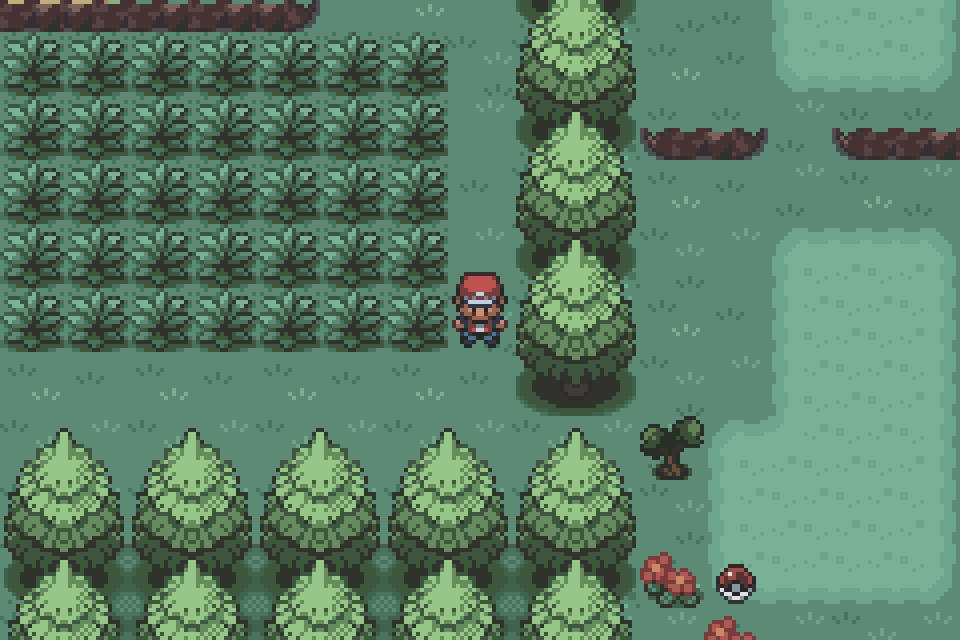

In [518]:
Go_to_game()
screenshot()

In [513]:
dirs

['left', 'left', 'left', 'left', 'left', 'down', 'down', 'down', 'down']

In [514]:
vision.mirando=None
Go_to_game()
for dir in dirs:
    vision.Orientar_mirada(dir)
    vision.Moverse(dir)

In [511]:
print(vision.mapa_simplified())

UUUUUOUOUOOOOO
UUUUUUUOUOUUUU
UUUUUOUOUUUUUU
OOOOOOOTUUUUUU
OOOOOOOPUUUUUU
OOOOOOOOUUUUUU
OOUOOOUOOOOOOO
UXUXOOUOOOOOOO
UUUUOOUOOOUUUU
X are walls
P is the player
U is something unknown
O is background
T is a temporarily unknown



In [489]:
vision._mapa_simplified_as_array()[8][2]

'U'

In [250]:
vision.update()

Nada


In [253]:
print(vision.mapa_simplified())

UUUUUUUUUUUUUO
UUUUUUOOOOOOOO
UUUUUUUUUUUUUO
UUUUUUUTUUUUUO
UUUUUUUPUUUUUO
UUUUUUUUUUUUUO
UUUUUUUUUUUUUO
UUUUUUUUUUUUUO
UUUUUUUUUUUUUO
X are walls
P is the player
U is something unknown
O is background
T is a temporarily unknown



In [135]:
vision.update()

In [435]:
Go_to_game()
vision.Orientar_mirada("left")

''

In [52]:
vision.mirando=None

In [212]:
Go_to_game()
vision.Estudiar_casilla("up")

walkable:False, interactable:False, door:False
"name":28,
                    tipo=wall,
                    walkable=False
                    interactable=False
                    door=False
                    investigated=True
                    text_info=
                    objetos_iguales=[]
                    transformable_en=[]


In [31]:
print(vision.mapa_simplified())

UUUUUUUUUUUUUU
UUUUUUUUUUUUUU
UUUUUUUUUUUUUU
UUUUUUUUUUUUUU
UUUUUUUPUUUUUU
UUUUUUUUUUUUUU
UUUUUUUUUUUUUU
UUUUUUUUUUUUUU
UUUUUUUUUUUUUU
X are walls
P is the player
U is something unknown
O is background



In [41]:
vision.update()

In [40]:
Go_to_game()
vision=Vision_class()

In [31]:
Go_to_game()
vision.Orientar_mirada("up")

In [60]:
vision.Hay_texto()

True

In [415]:
Read_text()

'Heal Your POK&MON!\nPOKéMON CENTER\n'

In [56]:
Hay_texto()

False

In [11]:
def En_Buffer_texto():
    #Mira si está la flechita roja en la zona de texto de abajo
    return pyautogui.locateOnScreen('Images_direccion/flecha_buffer_2.png',confidence=0.9,region=(990, 695,900, 180)) is not None


In [28]:
vision.mapa

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  7,  8,  7,  8,  7,  8],
       [ 7,  8,  3,  4,  5,  6,  1,  2,  1,  2,  1,  2,  1,  2],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  7,  8,  7,  8,  7,  8],
       [ 7,  8,  3,  4,  5,  6,  9, -2,  9, 10,  9, 10,  9, 10],
       [ 1,  2,  3,  4,  5,  5, 11, -1, 11, 11, 11, 11, 11, 12],
       [ 7,  8,  3,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6],
       [ 1,  2,  3, 13, 14, 14, 14, 14, 14, 14, 14,  5,  5,  6],
       [ 7,  8, 15, 16, 16, 16, 16, 16, 17,  3,  3, 18, 19, 20],
       [ 1,  2, 21, 22, 23, 11, 11, 11, 11, 11, 11,  5,  5,  6]])

In [35]:
Go_to_game()
vision=Vision_class()
vision.update()
#vision.describe()

In [17]:
vision.update()

In [52]:
#AI.Reset_conv()
situacion_actual="Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa"
AI.Continue_conv(f"""Tu situacion actual es: {situacion_actual}.
Actualmente ves: 
{vision.mapa_simplified()}
Tienes dos opciones:
1. Moverte a otra celda del mapa actual.
2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).
Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número.""")

Pokemon Trainer: unknown
O is background

Tienes dos opciones:
1. Moverte a otra celda del mapa actual.
2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).
Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número. Pokemon Trainer: unknown
O is background

Tienes dos opciones:
1. Moverte a otra celda del mapa actual.
2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).
Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número. Pokemon Trainer: 2 User: User: Tu situacion actual es: Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa.
Actualmente ves: 
UUUUUUUUUUXXOO
OOOOOOOOOOXXOO
OOOOOOOOOOXXOU
XXXXXXXUOOXXOO
OOOOOOOPOOXXOO
OOOOOOOOOOXXXX
OOOOOOOOOOXXOO
OOOOOOOOOOXXOO
OOOOOOOOOOXXOO
X are walls
P is the player
U is something unknown
O is background

Tienes dos opciones:
1. Moverte a otra celda del mapa actual

'unknown\nO is background\n\nTienes dos opciones:\n1. Moverte a otra celda del mapa actual.\n2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).\nElige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número. Pokemon Trainer: unknown\nO is background\n\nTienes dos opciones:\n1. Moverte a otra celda del mapa actual.\n2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).\nElige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número. Pokemon Trainer: 2 User: User: Tu situacion actual es: Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa.\nActualmente ves: \nUUUUUUUUUUXXOO\nOOOOOOOOOOXXOO\nOOOOOOOOOOXXOU\nXXXXXXXUOOXXOO\nOOOOOOOPOOXXOO\nOOOOOOOOOOXXXX\nOOOOOOOOOOXXOO\nOOOOOOOOOOXXOO\nOOOOOOOOOOXXOO\nX are walls\nP is the player\nU is something unknown\nO is background\n\nTienes dos opciones:\n1. Moverte a otra celda de

In [19]:
print(f"""Tu situacion actual es: {situacion_actual}.
Actualmente ves: 
{vision.mapa_simplified()}
Tienes dos opciones:
1. Moverte a otra celda del mapa actual.
2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).
Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número.""")

Tu situacion actual es: Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa.
Actualmente ves: 
UUUUUUUUUUXXOO
OOOOOOOOOOXXOO
OOOOOOOOOOXXOU
XXXXXXXOOOXXOO
OOOOOOOOOOXXOO
OOOOOOOOOOXXXX
OOOOOOOOOOXXOO
OOOOOOOOOOXXOO
OOOOOOOOOOXXOO
X are walls
P is the player
U is something unknown
O is background

Tienes dos opciones:
1. Moverte a otra celda del mapa actual.
2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).
Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número.


In [29]:
AI.Continue_conv("""Con qué celda deseas interactuar?
Tienes 4 opciones:
1. La celda de arriba
2. La celda de abajo
3. La celda de la izquierda
4. La celda de la derecha
Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número.""")

Pokemon Trainer: 4


'4'

In [30]:
AI.Continue_conv("""No ha sucedido nada al tratar de interactuar con el objeto enfrente tuya""")

Pokemon Trainer: 2


'2'

In [32]:
situacion_actual="Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa"
AI.Continue_conv(f"""Tu situacion actual es: {situacion_actual}. No ha sucedido nada al tratar de interactuar con el objeto enfrente tuya
Actualmente ves: 
{vision.mapa_simplified()}
Tienes dos opciones:
1. Moverte a otra celda del mapa actual.
2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).
Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número.""")

Pokemon Trainer: 

OOOOOXXOO
OOOOOOOOOOXXXX
OOOOOOOOOOXXOO
OOOOOOOOOOXXOO
OOOOOOOOOOXXOO
X are walls
P is the player
U is something unknown
O is background

Tienes dos opciones:
1. Moverte a otra celda del mapa actual.
2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).
Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número. Pokemon Trainer: OOOOOXXOO
OOOOOOOOOOXXXX
OOOOOOOOOOXXOO
OOOOOOOOOOXXOO
OOOOOOOOOOXXOO
X are walls
P is the player
U is something unknown
O is background

Tienes dos opciones:
1. Moverte a otra celda del mapa actual.
2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).
Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número. Pokemon Trainer: 2 User: User: Tu situacion actual es: Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa. No ha sucedido nada al tratar de interactuar con el objeto enfrente tuya

'OOOOOXXOO\nOOOOOOOOOOXXXX\nOOOOOOOOOOXXOO\nOOOOOOOOOOXXOO\nOOOOOOOOOOXXOO\nX are walls\nP is the player\nU is something unknown\nO is background\n\nTienes dos opciones:\n1. Moverte a otra celda del mapa actual.\n2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).\nElige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número. Pokemon Trainer: OOOOOXXOO\nOOOOOOOOOOXXXX\nOOOOOOOOOOXXOO\nOOOOOOOOOOXXOO\nOOOOOOOOOOXXOO\nX are walls\nP is the player\nU is something unknown\nO is background\n\nTienes dos opciones:\n1. Moverte a otra celda del mapa actual.\n2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).\nElige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número. Pokemon Trainer: 2 User: User: Tu situacion actual es: Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa. No ha sucedido nada al tratar de interactuar 

In [34]:
AI.Reset_conv()
AI.Continue_conv("""You are a Pokémon trainer whose goal is to defeat gym leaders and explore the map as much as possible.
Currently, you see:
UUUUUUUUUUXXOO
OOOOOOOOOOXXOO
OOOOOOOOOOXXOU
XXXXXXXOOOXXOO
OOOOOOOPOOXXOO
OOOOOOOOOOXXXX
OOOOOOOOOOXXOO
OOOOOOOOOOXXOO
OOOOOOOOOOXXOO
X represents walls (non-interactive)
P represents the player
U represents something unknown
O represents a walkable cell (non-interactive)

You have two options:
1. Move to another cell in the current map.
2. Interact with an object in an adjacent cell to you (the player).
Choose one of these options by selecting the corresponding number, and only the number.""")

Pokemon Trainer: 2


'2'

In [50]:
print(vision.mapa_simplified())

UUUUUUUUUUUXXO
OOOOOOOOOOOXXO
OOOOOOOOOOOXXO
XXXXXXXXOOOXXO
OOOOOOOOOOOXXO
OOOOOOOOOOOXXX
OOOOOOOOOOOXXO
OOOOOOOOOOOXXO
OOOOOOOOOOOXXO



In [3]:
situacion_actual="Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa"
print(f"""Tu situacion actual es: {situacion_actual}. No ha sucedido nada al tratar de interactuar con el objeto enfrente tuya
Actualmente ves: 
UUUUUUUUUUUXXO
OOOOOOOOOOOXXO
OOOOOOOOOOOXXO
XXXXXXXXOOOXXO
OOOOOOOOOOOXXO
OOOOOOOOOOOXXX
OOOOOOOOOOOXXO
OOOOOOOOOOOXXO
OOOOOOOOOOOXXOTienes dos opciones:
1. Moverte a otra celda del mapa actual.
2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).
Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número.""")

Tu situacion actual es: Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa. No ha sucedido nada al tratar de interactuar con el objeto enfrente tuya
Actualmente ves: 
UUUUUUUUUUUXXO
OOOOOOOOOOOXXO
OOOOOOOOOOOXXO
XXXXXXXXOOOXXO
OOOOOOOOOOOXXO
OOOOOOOOOOOXXX
OOOOOOOOOOOXXO
OOOOOOOOOOOXXO
OOOOOOOOOOOXXOTienes dos opciones:
1. Moverte a otra celda del mapa actual.
2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).
Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número.


In [4]:
#AI.Reset_conv()
situacion_actual="Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa"
AI.Continue_conv(f"""Tu situacion actual es: {situacion_actual}.
                    Actualmente ves: 
                    {vision.describe()}.
                    Tienes dos opciones:
                    1. Moverte a otra celda del mapa actual.
                    2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).

                    Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número.""")

NameError: name 'AI' is not defined

In [22]:
#Caso respuesta 1
situacion_actual="Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa"
AI.Continue_conv(f"""Tu situacion actual es: {situacion_actual}.
                    Actualmente ves: 
                    {vision.describe()}.
                    Elige una una celda a la que quieras ir con coordenadas (x,y) relativas al jugador. Así, considera que el jugador está en la posición (0,0).
                    
                    Respondeme diciéndome solo las coordenadas a las que deseas ir. Dimelo en el formato (x,y).""")

Pokemon Trainer: (10,10)


'(10,10)'

In [25]:
Go_to_game()
vision.Go_to(10,10)

No cambio
No cambio
No cambio


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 Go_to_game()                                                                                 │
│ ❱ 2 vision.Go_to(10,10)                                                                          │
│   3                                                                                              │
│                                                                                                  │
│ in Go_to:158                                                                                     │
│                                                                                                  │
│   155 │   │   │   self.update("up")                                                              │
│   156 │   │   │   sleep(0.1)                                                                     │
│   157 │   │   │   self.mirando="up"                                                              │
│ ❱ 158 │   │   │   self.Go_to(x,y-1)                                                              │
│   159 │   │   elif y<0:                                                                          │
│   160 │   │   │   Apply_command("down")                                                          │
│   161 │   │   │   if not self.Ha_cambiado_el_mapa():                                             │
│                                                                                                  │
│ in Go_to:158                                                                                     │
│                                                                                                  │
│   155 │   │   │   self.update("up")                                                              │
│   156 │   │   │   sleep(0.1)                                                                     │
│   157 │   │   │   self.mirando="up"                                                              │
│ ❱ 158 │   │   │   self.Go_to(x,y-1)                                                              │
│   159 │   │   elif y<0:                                                                          │
│   160 │   │   │   Apply_command("down")                                                          │
│   161 │   │   │   if not self.Ha_cambiado_el_mapa():                                             │
│                                                                                                  │
│ in Go_to:158                                                                                     │
│                                                                                                  │
│   155 │   │   │   self.update("up")                                                              │
│   156 │   │   │   sleep(0.1)                                                                     │
│   157 │   │   │   self.mirando="up"                                                              │
│ ❱ 158 │   │   │   self.Go_to(x,y-1)                                                              │
│   159 │   │   elif y<0:                                                                          │
│   160 │   │   │   Apply_command("down")                                                          │
│   161 │   │   │   if not self.Ha_cambiado_el_mapa():                                             │
│                                                                                                  │
│ in Go_to:158                                                                                     │
│                                                                                                  │
│   155 │   │   │   self.update("up")                        

In [ ]:
#Caso respuesta 2
situacion_actual="Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa"
AI.Continue_conv(f"""Tu situacion actual es: {situacion_actual}.
                    Actualmente ves: 
                    {vision.describe()}.
                    Elige una una celda adyacente con la que quieras interactuar. Tienes 4 opciones:
                    1. Interactuar con la celda de arriba.
                    2. Interactuar con la celda de abajo.
                    3. Interactuar con la celda de la izquierda.
                    4. Interactuar con la celda de la derecha.
                    
                    Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número.""")

Pokemon Trainer: 3


'3'

In [ ]:
Go_to_game()

True

In [ ]:
x=AI.Continue_conv(f"""Tu situacion actual es: {situacion_actual}.
                    Actualmente ves: 
                    {vision.describe()}.
                    Tienes dos opciones:
                    1. Moverte a otra celda del mapa actual.
                    2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).

                    Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número.""")

Pokemon Trainer: a actual.
                    2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).

                    Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número. Pokemon Trainer: a actual.
                    2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).

                    Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número. Pokemon Trainer: 2 User: User: Tu situacion actual es: Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa.
                    Actualmente ves: 
                    -2: Ignora este objeto en esta ronda
-1: Is the player character
0:  Is unknown what it is
1:  Is unknown what it is
7:  Is unknown what it is
8:  Is unknown what it is
9:  Is unknown what it is
10:  Is unknown what it is
11:  Is unknown what it is
16:  Is unknown what it is
17:  Is unknown wha

In [ ]:
print(x)

a actual.
                    2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).

                    Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número. Pokemon Trainer: a actual.
                    2. Interactuar con algún objeto en una celda adyacente a ti (el jugador).

                    Elige una de estas opciones eligiendo el número correspondiente a la opción, y solo el número. Pokemon Trainer: 2 User: User: Tu situacion actual es: Eres un entrenador pokemon cuyo objetivo es vencer a los líderes de los gimnasios y explorar todo lo posible el mapa.
                    Actualmente ves: 
                    -2: Ignora este objeto en esta ronda
-1: Is the player character
0:  Is unknown what it is
1:  Is unknown what it is
7:  Is unknown what it is
8:  Is unknown what it is
9:  Is unknown what it is
10:  Is unknown what it is
11:  Is unknown what it is
16:  Is unknown what it is
17:  Is unknown what it is
18:  Is u

In [ ]:
Go_to_game()
Trainer_info=Trainer_info_class(Pokemons=[Pokemon_class("Charmander".lower(),level=5,max_hp=39,status="",has_fainted=False,hp=39)])
Pelear(Trainer_info,AI)

Pelear? True
buscando movs
movs encontrados ['scratch', 'growl']
Pokemon Trainer: Scratch
leyendo texto
leyendo texto
leyendo texto
leyendo texto
leyendo texto
leyendo texto
Pokemon Trainer: Scratch
leyendo texto
leyendo texto
leyendo texto
leyendo texto
leyendo texto
leyendo texto
leyendo texto
leyendo texto
Pokemon Trainer: Scratch
leyendo texto
leyendo texto
leyendo texto
leyendo texto
Pokemon Trainer: Scratch
leyendo texto
leyendo texto
leyendo texto
leyendo texto
leyendo texto
leyendo texto


In [ ]:
del Pelear

In [ ]:
from Python_code.Fight_code import *

In [ ]:
Go_to_game()
vision=Vision_class()
for i in range(10000):
    vision.update()
    sleep(0.1)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│   1 Go_to_game()                                                                                 │
│   2 vision=Vision_class()                                                                        │
│   3 for i in range(10000):                                                                       │
│ ❱ 4 │   vision.update()                                                                          │
│   5 │   sleep(0.1)                                                                               │
│   6                                                                                              │
│                                                                                                  │
│ in update:17                                                                                     │
│                                                                                                  │
│    14 │   │   │   self.mapa=mapa_actual                                                          │
│    15 │   │   │   return                                                                         │
│    16 │   │   else:                                                                              │
│ ❱  17 │   │   │   if not self.Es_el_mismo_mapa(mapa_actual):                                     │
│    18 │   │   │   │   if traslacion is None:                                                     │
│    19 │   │   │   │   │   #Si el input the traslación es vacío miramos si se ha trasladado el    │
│    20 │   │   │   │   │   traslacion=self.direccion_traslado(mapa_actual)                        │
│                                                                                                  │
│ in Es_el_mismo_mapa:47                                                                           │
│                                                                                                  │
│    44 │   │   │   for j in range(len(mapa[0])):                                                  │
│    45 │   │   │   │   if (not (i in [3,4] and j==7)) and (not (i+tras_i in [3,4] and (j+tras_j   │
│    46 │   │   │   │   │   cuentas+=1                                                             │
│ ❱  47 │   │   │   │   │   if not Objetos_son_iguales(self.mapa[i+tras_i][j+tras_j],mapa[i][j])   │
│    48 │   │   │   │   │   │   cambios+=1                                                         │
│    49 │   │   │   │   │   │   pos_cambios.append((i,j))                                          │
│    50                                                                                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'Objetos_son_iguales' is not defined

In [ ]:
Info_object(np.array([0]).astype("int")[0]).save()

In [ ]:
AI.Reset_conv()

min_dist=1000;count=0
while min_dist>5 and count<5:
    
    mov=AI.Continue_conv(f"""{'That is not a valid move. '*(min_dist)==1000}You are a pokemon trainer that can only shout out moves. You are in a battle and your current pokemon is a {current_pokemon}. 
            The opponent is a {opponent_pokemon} with green health. Your {current_pokemon} has as moves: {" and ".join(moves_current_pokemon)}. 
            {Pokemon.moves_explanation()}
            Choose the move you consider the fastest way to KO your opponent in this situation. Answer only and only with the move you want to use.
                """)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:6                                                                                    │
│                                                                                                  │
│    3 min_dist=1000;count=0                                                                       │
│    4 while min_dist>5 and count<5:                                                               │
│    5 │                                                                                           │
│ ❱  6 │   mov=AI.Continue_conv(f"""{'That is not a valid move. '*(min_dist)==1000}You are a po    │
│    7 │   │   │   The opponent is a {opponent_pokemon} with green health. Your {current_pokemo    │
│    8 │   │   │   {Pokemon.moves_explanation()}                                                   │
│    9 │   │   │   Choose the move you consider the fastest way to KO your opponent in this sit    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'current_pokemon' is not defined

In [ ]:
AI.Reset_conv()
AI.Continue_conv(msg)

Pokemon Trainer: (4,4)


'(4,4)'

In [ ]:
msg=""
msg=f"You currently see:\n {mapa.astype(int)}\nThese numbers mean:\n"
for num in np.unique(mapa):
    msg+=f"{Info_object(num).describe()}\n"

#msg+="Choose a place on the what you see that hasn´t been investigated to go to, and give me the coordinates of where it is in (x,y) format knowing that the the player is considered (0,0). Only give me the coordinates of where you wanna go in '(x,y)' format."""#bottom left corner is (0,0)"
#msg+="Choose the closest place to the player on what you see that hasn´t been investigated to go to, and give me the coordinates of where it is in (x,y) format knowing that the the player is considered (0,0). Only give me the coordinates of where you wanna go in '(x,y)' format."""#bottom left corner is (0,0)"
msg+="Choose one of the closest place to the player on what you see to go to, and give me the coordinates of where it is in (x,y) format knowing that the the player is considered (0,0). Only give me the coordinates of where you wanna go in '(x,y)' format."""#bottom left corner is (0,0)"

In [ ]:
AI.Continue_conv("You´re not even close")

Pokemon Trainer: I apologize for the mistake. The correct coordinates for the nearest location to the player are (2,4).


'I apologize for the mistake. The correct coordinates for the nearest location to the player are (2,4).'

In [ ]:
print(msg)

You currently see:
 [[ 4  4  4  4  4 23 24 24 24 24 24 24 24 24]
 [25 25 25 25 25 24 24 24 26 27 28 28 28 28]
 [24 24 24 24 24 24 24 29  4 30 31 31 31 31]
 [32 33 33 34 35 26 26  3  4 36 37 37 37 37]
 [38 38 39 40 41  4  4 -1 42 43 44 45 46 47]
 [48 48 48 49 48  4  4  4 50 51 52 53 54 55]
 [56 57 58 59 60  4  4  4  4  4 61  4  4  4]
 [62 62 62 63 63 13 17 17 17 17 17 17 17 17]
 [ 4  4  4  4  4  4  4  4  4  4  4  4  4  4]]
These numbers mean:
-1: Is the player character
3:  Is unknown what it is
4:  Is unknown what it is
13:  Is unknown what it is
17:  Is unknown what it is
23:  Is unknown what it is
24:  Is unknown what it is
25:  Is unknown what it is
26:  Is unknown what it is
27:  Is unknown what it is
28:  Is unknown what it is
29:  Is unknown what it is
30:  Is unknown what it is
31:  Is unknown what it is
32:  Is unknown what it is
33:  Is unknown what it is
34:  Is unknown what it is
35:  Is unknown what it is
36:  Is unknown what it is
37:  Is unknown what it is
38:  Is unknown

In [ ]:
Go_to_game()
current_map=crop_into_pixels(screenshot())
mapa=find_and_save_unique_images(current_map)

In [ ]:
mapa

array([[ 4.,  4.,  4.,  4.,  4., 23., 24., 24., 24., 24., 24., 24., 24.,
        24.],
       [25., 25., 25., 25., 25., 24., 24., 24., 26., 27., 28., 28., 28.,
        28.],
       [24., 24., 24., 24., 24., 24., 24., 29.,  4., 30., 31., 31., 31.,
        31.],
       [32., 33., 33., 34., 35., 26., 26., 87.,  4., 36., 37., 37., 37.,
        37.],
       [38., 38., 39., 40., 41.,  4.,  4.,  4., 42., 43., 44., 45., 46.,
        47.],
       [48., 48., 48., 49., 48.,  4.,  4.,  4., 50., 51., 52., 53., 54.,
        55.],
       [56., 57., 58., 59., 60.,  4.,  4.,  4.,  4.,  4., 61.,  4.,  4.,
         4.],
       [62., 62., 62., 63., 63., 13., 17., 17., 17., 17., 17., 17., 17.,
        17.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.]])

In [ ]:
Go_to_game()
for i in range(10000):
    vision.update()

[-2 -1  1  2  3  4  5  6  7  8  9 11 12 16 22]
[-2 -1  0  1  2  3  4  5  6  7  8  9 11 12 16]
0->0 Esta rodeado :)
0 <class 'int'>
0 <class 'int'>
0 no es transformable en 0
0->0 Esta rodeado :)
0 <class 'int'>
0 <class 'int'>


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:3                                                                                    │
│                                                                                                  │
│   1 Go_to_game()                                                                                 │
│   2 for i in range(10000):                                                                       │
│ ❱ 3 │   vision.update()                                                                          │
│   4                                                                                              │
│                                                                                                  │
│ in update:18                                                                                     │
│                                                                                                  │
│    15 │   │   │   self.mapa=mapa_actual                                                          │
│    16 │   │   │   return                                                                         │
│    17 │   │   else:                                                                              │
│ ❱  18 │   │   │   if not self.Es_el_mismo_mapa(mapa_actual):                                     │
│    19 │   │   │   │   if traslacion is None:                                                     │
│    20 │   │   │   │   │   #Si el input the traslación es vacío miramos si se ha trasladado el    │
│    21 │   │   │   │   │   traslacion=self.direccion_traslado(mapa_actual)                        │
│                                                                                                  │
│ in Es_el_mismo_mapa:67                                                                           │
│                                                                                                  │
│    64 │   │   │   │   │   Esta_rodeado=False                                                     │
│    65 │   │   │   if Esta_rodeado:                                                               │
│    66 │   │   │   │   print(f"{mapa[cambio[0]][cambio[1]]}->{mapa[cambio[0]+tras_i][cambio[1]+   │
│ ❱  67 │   │   │   │   Info_object(mapa[cambio[0]][cambio[1]]).Add_transformation(mapa[cambio[0   │
│    68 │   │                                                                                      │
│    69 │   │   ##Si el número de cambios es menor o igual que 4 (una persona cambia de backgrou   │
│    70 │   │   #if cambios<=4:                                                                    │
│                                                                                                  │
│ in Add_transformation:67                                                                         │
│                                                                                                  │
│   64 │   │   │   print(name,"no es transformable en",self.name)                                  │
│   65 │   │   │   self.transformable_en.append(int(name))                                         │
│   66 │   │                                                                                       │
│ ❱ 67 │   │   self.save()                                                                         │
│   68                                                                                             │
│   69                                                                                             │
│   70                                                                                             │
│                                                                                                  │
│ in save:28                                                                                       │
│                                                            

In [ ]:
Go_to_game()
Go_to(2,0)

Esta rodeado :)
Esta rodeado :)
No cambio
[ -2.  -1.   4.  16.  76.  77.  78.  79.  80.  81.  82.  84.  85.  86.
  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100.
 138.]
n_cambios 52
n_cambios 52
n_cambios 46
[-2. -1.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 16. 21.]
n_cambios 62
n_cambios 52


In [ ]:
vision=Vision_class()
vision.update()

[-2. -1.  1.  2.  3.  4.  5.  6.  7.  9. 10. 11. 12. 16. 21. 88.]


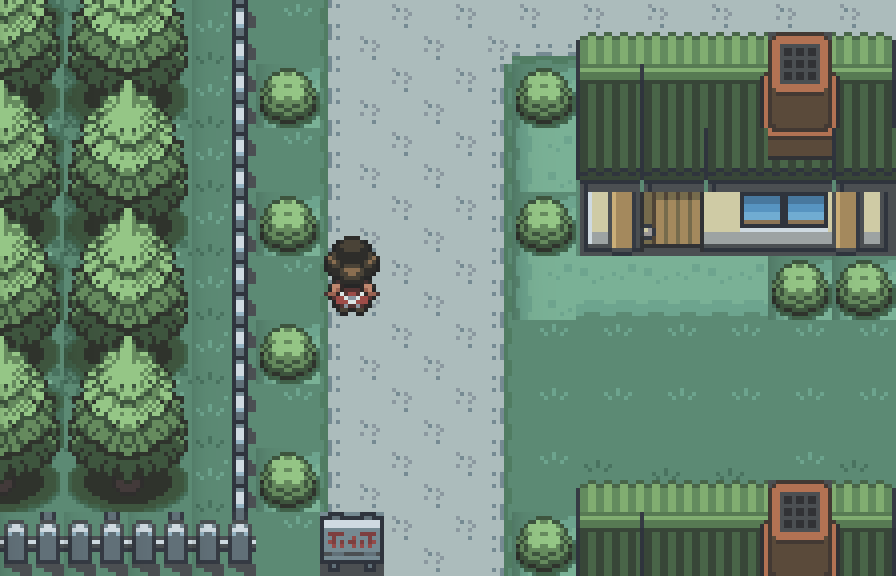

In [ ]:
show_numbers_to_image(vision.mapa)

In [ ]:
a.mapa

array([[ 4.,  9., 10.,  9., 10.,  4., 64., 25., 25., 25., 25., 25., 25.,
        25.],
       [ 4.,  4.,  4.,  4.,  4.,  4., 23., 24., 24., 24., 24., 24., 24.,
        24.],
       [25., 25., 25., 25., 25., 25., 24., 24., 24., 26., 27., 28., 28.,
        28.],
       [24., 24., 24., 24., 24., 24., 24., -2., 29.,  4., 30., 31., 31.,
        31.],
       [26., 32., 33., 33., 34., 35., 26., -1., 65.,  4., 36., 37., 37.,
        37.],
       [66., 38., 38., 39., 40., 41.,  4.,  4.,  4., 42., 43., 44., 45.,
        46.],
       [67., 48., 48., 48., 49., 48.,  4.,  4.,  4., 50., 51., 52., 53.,
        54.],
       [66., 56., 57., 58., 59., 60.,  4.,  4.,  4.,  4.,  4., 61.,  4.,
         4.],
       [67., 62., 62., 62., 63., 63., 13., 17., 17., 17., 17., 17., 17.,
        17.]])

In [ ]:
current_map=crop_into_pixels(screenshot())
mapa_actual=find_and_save_unique_images(current_map)
np.unique(mapa_actual)

array([-2., -1.,  4.,  9., 10., 13., 17., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
       42., 43., 44., 45., 46., 48., 49., 50., 51., 52., 53., 54., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67.])

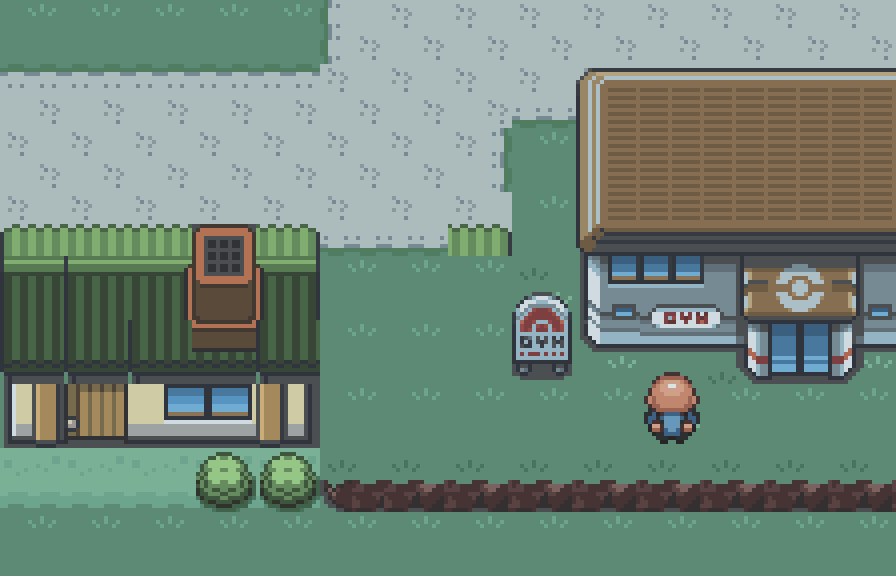

In [ ]:
show_numbers_to_image(mapa)

In [ ]:
for i in np.unique(mapa)[1:]:
    if Info_object(i).investigated

╭──────────────────────────────────────────────────────────────────────────────────────────────────╮
│     if Info_object(i).investigated                                                               │
│                                   ▲                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
SyntaxError: expected ':'

In [ ]:
Go_to_game()

True

In [ ]:
Go_to_game()
Pelear()

Pelear? False


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 Go_to_game()                                                                                 │
│ ❱ 2 Pelear()                                                                                     │
│   3                                                                                              │
│                                                                                                  │
│ in Pelear:51                                                                                     │
│                                                                                                  │
│   48 │   │   │   print("leyendo texto")                                                          │
│   49 │   │   │   Read_battle_text()                                                              │
│   50 │                                                                                           │
│ ❱ 51 │   sleep(5)                                                                                │
│   52 │   #Asumiendo que hemos ganado debemos pulsar A hasta que salgamos de la batalla           │
│   53 │   while En_Buffer_texto_batalla():                                                        │
│   54 │   │   logger.debug("Func Pelear: En buffer de texto tras terminar pelear")                │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyboardInterrupt

In [ ]:
Trainer_info=Trainer_info_class(Pokemons=[Pokemon_class("Charmander".lower(),level=5,max_hp=39,status="",has_fainted=False,hp=39)])

In [ ]:
 AI.Reset_conv()

                
mov=AI.Continue_conv(f"""You are a pokemon trainer whose goal is to explore the world, beat the gym leaders and become pokemon champion.
Tell me a goal you would like to achieve in the format:
Go to ...

Your current view is:


""")

['scratch', 'growl']

In [ ]:
Go_to_game()

True

In [ ]:
Trainer_info=Trainer_info_class(Pokemons=[Pokemon_class("Charmander".lower(),level=5,max_hp=39,moves=["scratch","growl","ember"],status="",has_fainted=False,hp=39)])

In [ ]:
AI.Reset_conv()
AI.Continue_conv(f"""Is there new knowledge of any of the following forms:
                    Learning a new move
                    level Up
                    Evolution
                    Received money
                    Received a badge
                    Caught a pokemon
                    in the following text: Charizard learned Flamethrower!
                    Answer with one and only one of the options:
                    Learning a new move
                    level Up
                    Evolution
                    Received money
                    Received a badge
                    Caught a pokemon                   
                    None
                    where None is for when there is no new information
                    """
                    )

Pokemon Trainer: Learning a new move (Charizard learned Flamethrower!)


'Learning a new move (Charizard learned Flamethrower!)'

In [ ]:
f"""In the following text: {a[0]}, is there new knowlegde of any of the following forms:
                    Learning a new move
                    level Up
                    Evolution
                    Received money
                    Received a badge
                    Caught a pokemon
                    
                    Answer only with one of the options presented and answer None if there is no new information
                    """

"In the following text: 'CHARMANDER orew to\nLY. 7\n, is there new knowlegde of any of the following forms:\n                    Learning a new move\n                    level Up\n                    Evolution\n                    Received money\n                    Received a badge\n                    Caught a pokemon\n                    \n                    Answer only with one of the options presented and answer None if there is no new information\n                    "

In [ ]:
Go_to_game()
while True:
    for i in range(15):
        Apply_command("left")
    for i in range(15):
        Apply_command("right")
    Pelear()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:4                                                                                    │
│                                                                                                  │
│   1 Go_to_game()                                                                                 │
│   2 while True:                                                                                  │
│   3 │   for i in range(15):                                                                      │
│ ❱ 4 │   │   Apply_command("left")                                                                │
│   5 │   for i in range(15):                                                                      │
│   6 │   │   Apply_command("right")                                                               │
│   7 │   Pelear()                                                                                 │
│                                                                                                  │
│ in Apply_command:10                                                                              │
│                                                                                                  │
│    7 │   │   pyautogui.keyUp('b')                                                                │
│    8 │   if key=="left":                                                                         │
│    9 │   │   pyautogui.keyDown('left')                                                           │
│ ❱ 10 │   │   pyautogui.keyUp('left')                                                             │
│   11 │   if key=="right":                                                                        │
│   12 │   │   pyautogui.keyDown('right')                                                          │
│   13 │   │   pyautogui.keyUp('right')                                                            │
│                                                                                                  │
│ c:\Users\Rafa\miniconda3\lib\site-packages\pyautogui\__init__.py:595 in wrapper                  │
│                                                                                                  │
│    592 │   def wrapper(*args, **kwargs):                                                         │
│    593 │   │   failSafeCheck()                                                                   │
│    594 │   │   returnVal = wrappedFunction(*args, **kwargs)                                      │
│ ❱  595 │   │   _handlePause(kwargs.get("_pause", True))                                          │
│    596 │   │   return returnVal                                                                  │
│    597 │                                                                                         │
│    598 │   return wrapper                                                                        │
│                                                                                                  │
│ c:\Users\Rafa\miniconda3\lib\site-packages\pyautogui\__init__.py:639 in _handlePause             │
│                                                                                                  │
│    636 │   """                                                                                   │
│    637 │   if _pause:                                                                            │
│    638 │   │   assert isinstance(PAUSE, int) or isinstance(PAUSE, float)                         │
│ ❱  639 │   │   time.sleep(PAUSE)                                                                 │
│    640                                                                                           │
│    641                                                                                           │
│    642 def _normalizeXYArgs(firstArg, secondArg):          

In [ ]:
En_batalla()

'charnanders —\n'

In [ ]:
AI.Continue_conv("""You are a pokemon trainer that can only shout out moves. You are in a battle and your current pokemon is a Charmander with 20/20 HP. 
                        The opponent is a Caterpie with green health. Your charmander has as moves: scratch and growl. 
                        Choose the move you consider the fastest way to KO your opponent in this situation. Answer only and only with the move you want to use.
                        """)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 AI.Continue_conv("""You are a pokemon trainer that can only shout out moves. You are in      │
│   2 │   │   │   │   │   │   The opponent is a Caterpie with green health. Your charmander ha     │
│   3 │   │   │   │   │   │   Choose the move you consider the fastest way to KO your opponent     │
│   4 │   │   │   │   │   │   """)                                                                 │
│                                                                                                  │
│ c:\Users\Rafa\Desktop\Pokemon\Pokemon_Trainer_AI.py:83 in Continue_conv                          │
│                                                                                                  │
│    80 │   │   prompt = self.conv.get_prompt()                                                    │
│    81 │   │                                                                                      │
│    82 │   │   gen_params = {                                                                     │
│ ❱  83 │   │   │   │   "model": model_path,                                                       │
│    84 │   │   │   │   "prompt": prompt,                                                          │
│    85 │   │   │   │   "temperature": temperature,                                                │
│    86 │   │   │   │   "repetition_penalty": repetition_penalty,                                  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'model_path' is not defined

In [ ]:
Go_to_game()
a=pyautogui.screenshot(region=(1060,840,200 , 70))
images_are_similar(a,Image.open("Images_direccion/In_fighting_options.png"))

0.042976885501719554


True